In [2]:
import scipy.integrate as integrate 
import math
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.integrate as integrate 
import cmath 
from scipy import optimize
from scipy.misc import derivative

from decimal import Decimal
from decimal import *
getcontext().prec = 64

In [3]:
 #Defining the (exact) Bosonic and fermionic thermal functions to be used it the effective potential

def Jb(m,T):
    
    def integrand(k,m,T):    
        return k**2*np.log(1 - np.exp(-np.sqrt(k**2 + (m/T)**2)))
        
    return T**4/(2*np.pi**2)*integrate.quad(integrand, 0, np.inf, args = (m,T))[0]   

def Jf(m,T):
    
    def integrand(k,m, T):    
        return k**2*np.log(1 + np.exp(-np.sqrt(k**2 + (m/T)**2)))
                                  
    return T**4/(2*np.pi**2)*integrate.quad(integrand, 0, np.inf, args = (m,T))[0]



# Derivatives of the thermal functions given by Jb and Jf 
# Ib is the derivative of the bosonic thermal function w.r.t m
def Ib(y):
    
    def integrand(k,y):
        return (k**2)/(np.sqrt(k**2 + y**2))*(np.exp(-np.sqrt((k**2 + y**2)))/(1 - np.exp(-np.sqrt(k**2 + y**2))))

    return -y*integrate.quad(integrand, 0, np.inf, args=(y))[0]

# If is the derivative of fermionic thermal function w.r.t. m 
def If(y):
    
    def integrand(k,y):
        return (k**2)/(np.sqrt(k**2 + y**2))*np.exp(-np.sqrt((k**2 + y**2)))/(1 + np.exp(-np.sqrt(k**2 + y**2)))

    return y*integrate.quad(integrand, 0, np.inf, args=(y))[0]




In [4]:
# Parameters and effective masses to be used in the effective potential
# constants of higgs tree level potential
mu = 3000
lam = 0.01
c6 = -1/10000
Lam = 246

#yukawa coupling constant of fermion f 
y_f = 0.99                                          #(for the top quark)

#EW - sector coupling constants g (SU(2)_L) and g_p (U(1)_Y) 
g = 0.65
g_p = 0.36
eps = 0.00001


# Effective mass of fermion f acquired through yukawa coupling w/ the Higgs
def m_f(phi):
    return y_f**2/2*phi**2 + eps

# W and Z boson masses
def m_W(phi):
    return (g**2/4)*phi**2 + eps

def m_Z(phi):
    return (g**2 + g_p**2)*phi**2/4 + eps

# Higgs and Goldstone masses
def m_h(phi):                                               
    return 3*lam*phi**2 - mu**2 - (15/4)*c6*phi**4 + eps

#m_h 0 at h_min = (2/5)*(lam/c6)*(1 - np.sqrt(1-5/3*c6*(mu**2)/lam**2))

def m_g(phi):
    return lam*phi**2 - mu**2 - (3/4)*c6*phi**4 + eps


Text(0.5, 1.0, '1-loop effective potential at T = 1131')

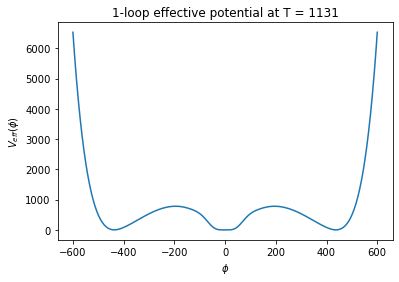

In [5]:
Lam = 246     # regulator/Cutoff(?)

#1-loop effective potential
def v_eff(phi,T):
    return np.real(-(mu**2)/2*phi**2 + (lam/4)*phi**4 - (c6/8)*phi**6
            + m_h(phi)**2/(64*np.pi**2)*(cmath.log(m_h(phi)/Lam) - 3/2) + Jb(m_h(phi),T)
            + 3*m_g(phi)**2/(64*np.pi**2)*(cmath.log(m_g(phi)/Lam) - 3/2) + 3*Jb(m_g(phi),T)
            + 3*m_Z(phi)**2/(64*np.pi**2)*(cmath.log(m_Z(phi)/Lam) - 5/6) + 3*Jb(m_Z(phi),T)
            + 6*m_W(phi)**2/(64*np.pi**2)*(cmath.log(m_W(phi)/Lam) - 5/6) + 6*Jb(m_W(phi),T)    
            - 12*m_f(phi)**2/(64*np.pi**2)*(cmath.log(m_f(phi)/Lam) - 3/2) - 12*Jf(m_f(phi),T)
           )/(Lam**4)

vecv_eff = np.vectorize(v_eff)


phi = np.linspace(-600,600,500)
T = 1131
arrv_eff = vecv_eff(phi,T) - v_eff(0,T)


plt.plot(phi, arrv_eff)
#plt.legend(loc = "lower left")
plt.xlabel('$\phi$')
plt.ylabel('$V_{eff}(\phi)$')
plt.title('1-loop effective potential at T = %1.0f'  % T)
#plt.ylim(-0.1*1e13, 1*1e13)

#Tree level min
#phi_min = ((2*lam)/(3*c6))*(1 - np.sqrt(1 - (3*c6*mu**2)/(lam**2)))


In [ ]:
#Finding the critical temperature where the effective potential acquires the same value at both minima


# defining a recursive method for finding the critical temperature up to some tolerance which is chosen when calling the 
# function. The function requires a span/interval of temperaturs to as to where it  
#
# The effective potential is normalized so that the first minimum is at v_eff(phi = 0) regadless of T   
# 
#
#
#

def find_t_crit(t_span, tolerance):
    T = np.mean(t_span)
    
    def v_eff_T(phi):
        T = np.mean(t_span)
        return v_eff(phi,T) - v_eff(0,T)
    min2 = v_eff_T(optimize.fmin(v_eff_T, 600)[0])
    
    
    if abs(min2) < tolerance:
        return T
    elif min2 > tolerance:                                      
        return find_t_crit([t_span[0], np.mean(t_span)],tolerance)
    elif min2 < -tolerance:
        return find_t_crit([np.mean(t_span), t_span[1]],tolerance)    
    
    return T


t_span = [1000, 1300]
tolerance = 1

t_c = find_t_crit(t_span, tolerance)   
print(t_c)

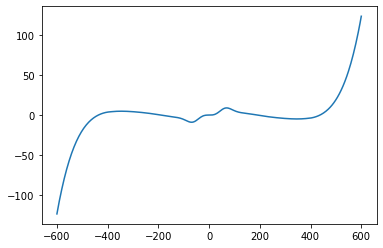

In [90]:
# Finding the bounce action.  
tn = 1100

def v_eff_tn(phi):
    return np.vectorize(v_eff)(phi,tn) - np.vectorize(v_eff)(0,tn)

arrv_eff = vecv_eff(phi,tn) - v_eff(0,tn)

def v_p(phi):
    return derivative(v_eff_tn, phi, dx = 0.00001, order=5)

def f(t,y):    
    A = y[0]
    B = y[1]
    
    dA_dt = B
    dB_dt = v_p(A) - (2/t)*B                               
                                                            
    return np.array([dA_dt, dB_dt])


plt.plot(phi, v_p(phi))

In [91]:
# finding the phi values of symmetric and broken phases to be later used in overshoot/undershoot method.
# the symmetric phase at phi ~ 5.87 very hard to reach since the potenial get's very flat around it. 
# it should suffice to use the 7.57 one instead (within the tolerance)

#finding phi within tolerance to use as stop condition for overshoot/undershoot
symm_vac = optimize.fmin(v_eff_tn, 0)[0]

#finding phi within tolerance to use as stop condition for overshoot/undershoot
x = np.linspace(0,10,100)

tol1 = 2e-2
max_min = x[np.max(np.where(np.abs(v_eff_tn(x) - (-0.033533))<tol1))]
broken_vac = optimize.fmin(v_eff_tn, 600)[0]

tol =  max_min - symm_vac

print(tol)
print(symm_vac)
print(broken_vac)

Optimization terminated successfully.
         Current function value: -0.017689
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -98.846052
         Iterations: 24
         Function evaluations: 48
1.1080839646464566
5.356562500000008
436.8891906738281


In [ ]:
# Full on over/undershoot implementation to find the bounce solution. Works in the same way as finding the critical temp
# algorithm get's stuck somtetimes due to np.mean not being sensitive enough(?).



print(broken_vac)
print(np.array([symm_vac - tol, symm_vac + tol]), '\n')

def over_undershoot(init_span, tol, max_i, iter = None):
    
    if iter is None:
        iter = 0
        
    iter +=1    
    
    if iter == max_i:
        print('arrived at max iterations')
        print('final span: ', init_span)
        
    else:
        t_span = np.array([eps,120])
        times  = np.linspace(t_span[0], t_span[1], 1000) 
        init = np.mean(init_span)
        y0 = np.array([init, 0])
    
        soln = solve_ivp(f, t_span, y0, t_eval = times)
        print(soln.message)   
    
    
        t = soln.t
        phi_b = soln.y[0] 
    
    
        if np.abs(phi_b[-1] - symm_vac) <= tol:
            print('Found it! y0=', init)
            print('And it ended at:', phi_b[-1])
            return phi_b, t, soln.y[1]
    
        elif phi_b[-1] < symm_vac - tol or phi_b[-1] > init:
            #condition for rolling down to the left towards phi = -inf &
            #condition for rolling down to the right towards phi = +inf  
            #This means we are too far high up in the span and initial condition is to high.
        
            print('iteration: ', iter)
            print('y0 = ', init)
            print('overshoot')
            print('final value of the solution:', phi_b[-1])
            print('\n')
            return over_undershoot([init_span[0], init], tol, max_i, iter)
    
        else:  #phi_b[-1] > symm_vac + tol and phi_b[-1] < init:
            # All other scenarios are undershoot.
            # The initial value is to low need to look higher up in the interval for the correct initial value
            
            print('iteration: ', iter)
            print('y0 = ',  init)
            print('undershoot')
            print('smallest value of the solution:' , np.min(phi_b))
            print('And it ended at', phi_b[-1])
            print('\n')
            return over_undershoot([init, init_span[1]],tol, max_i, iter)
                
              
init_span = np.array([435, 437])     
                                                      
phi_b , r , phi_dot = over_undershoot(init_span, tol, 100)


plt.plot(r, phi_b)

436.8891906738281
[4.24847854 6.46464646] 

The solver successfully reached the end of the integration interval.
iteration:  1
y0 =  436.0
undershoot
smallest value of the solution: 99.33986055471172
And it ended at 169.0921010761329


The solver successfully reached the end of the integration interval.
iteration:  2
y0 =  436.5
undershoot
smallest value of the solution: 94.53962589768373
And it ended at 162.87715784637672


The solver successfully reached the end of the integration interval.
iteration:  3
y0 =  436.75
undershoot
smallest value of the solution: 89.86150551567114
And it ended at 164.9248717060491


The solver successfully reached the end of the integration interval.
iteration:  4
y0 =  436.875
undershoot
smallest value of the solution: 81.81366557032406
And it ended at 209.42294132013555


Required step size is less than spacing between numbers.
iteration:  5
y0 =  436.9375
overshoot
final value of the solution: 1886.497100149256


Required step size is less than spacin

The solver successfully reached the end of the integration interval.
iteration:  48
y0 =  436.8891696391257
undershoot
smallest value of the solution: 60.81455482516936
And it ended at 277.17430437284395


The solver successfully reached the end of the integration interval.
iteration:  49
y0 =  436.8891696391257
undershoot
smallest value of the solution: 60.81455482516936
And it ended at 277.17430437284395




6.440876420429546
6.440876420429546


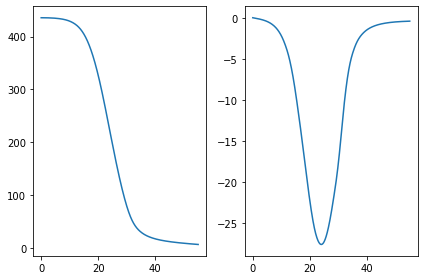

In [85]:
t_span = np.array([eps, 55])

times  = np.linspace(t_span[0], t_span[1], 1000) 

y0 = np.array([435.66070783561736, 0])


soln = solve_ivp(f, t_span, y0, t_eval=times) 

r = soln.t
phi_b = soln.y[0]
dphi_b = soln.y[1]

print(phi_b[-1]) 
print(min(phi_b))

plt.subplot(1,2,1)
plt.plot(r,phi_b) 

plt.subplot(1,2,2)
plt.plot(r,dphi_b)
plt.tight_layout() 